In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Lead and Check the datasets:

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test= pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Exploration:

## 1. A general look at the data:

### a)- Training set:

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
(train.isna().sum()/len(train)).sort_values(ascending = False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [7]:
train.duplicated().sum()

0

### b)- Test set:

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
(test.isna().sum()/len(test)).sort_values(ascending = False)

Cabin          0.782297
Age            0.205742
Fare           0.002392
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.000000
dtype: float64

In [10]:
test.duplicated().sum()

0

## 2)- Explore columns with quantitative (numerical) data:

### a)- Training set:

In [11]:
train[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


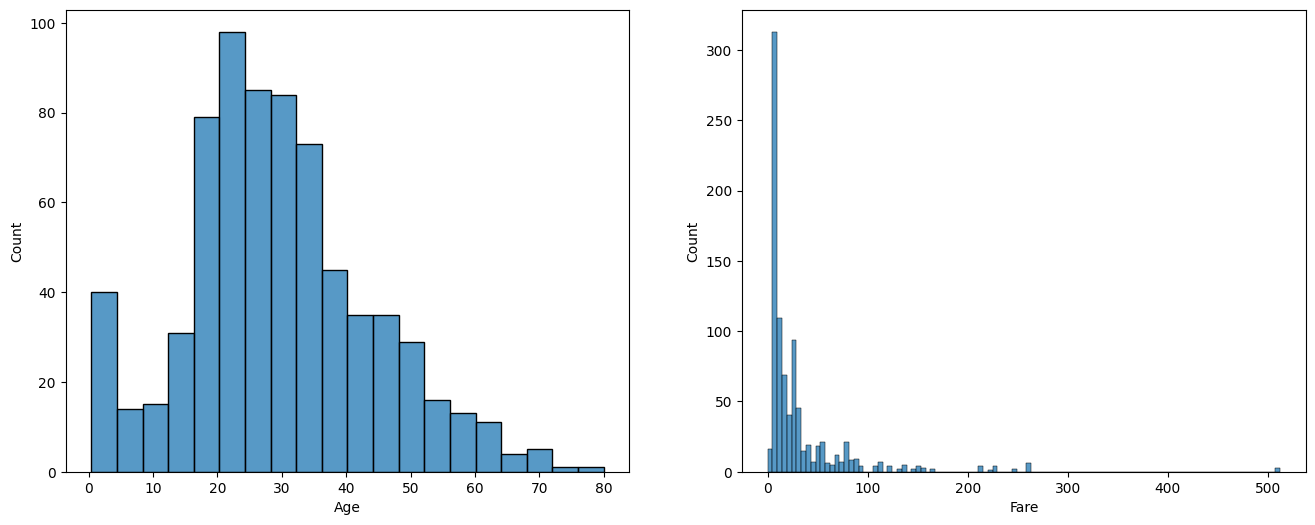

In [12]:
#Histogram:
fig, axs = plt.subplots(1,2,figsize=(16,6), gridspec_kw={'wspace': 0.2})
sns.histplot(train['Age'], ax = axs[0])
sns.histplot(train['Fare'], ax = axs[1])
plt.show()

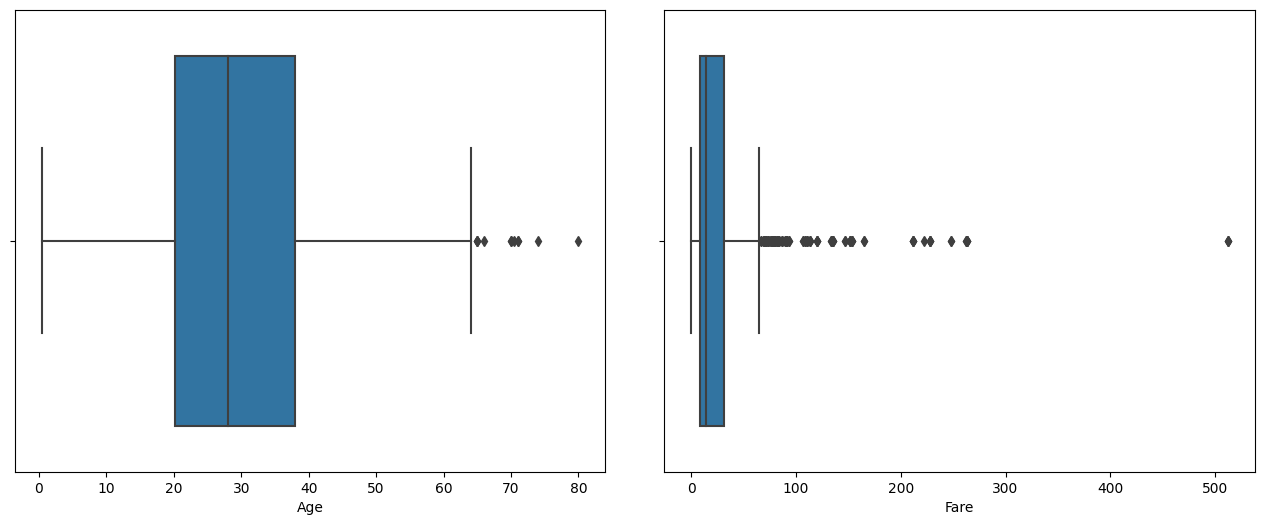

In [13]:
fig, axs = plt.subplots(1,2,figsize=(16,6), gridspec_kw={'wspace': 0.1})
sns.boxplot(x = train['Age'], ax = axs[0])
sns.boxplot(x = train['Fare'], ax = axs[1])
plt.show()

**Let's dive deeper and see the rows that contain outliers using the interquartile range (IQR) method.**

In [14]:
# Age:
Age_Q1 = train.Age.quantile(0.25)
Age_Q3 = train.Age.quantile(0.75)
Age_IQR = Age_Q3 - Age_Q1
Age_lower_extreme = Age_Q1 - 1.5*Age_IQR
Age_upper_extreme = Age_Q3 + 1.5*Age_IQR

In [15]:
#To see rows that contain outliers uing the interquartile range (IQR) method:
outlier_age = train[(train.Age<Age_lower_extreme)|(train.Age>Age_upper_extreme)]
print("the shape is:" ,outlier_age.shape)
print("-" * 20)
outlier_age.head(11)

the shape is: (11, 12)
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [16]:
# Fare:
Fare_Q1 = train.Fare.quantile(0.25)
Fare_Q3 = train.Fare.quantile(0.75)
Fare_IQR = Fare_Q3 - Fare_Q1
Fare_lower_extreme = Fare_Q1 - 1.5*Fare_IQR
Fare_upper_extreme = Fare_Q3 + 1.5*Fare_IQR

In [17]:
#To see rows that contain outliers uing the interquartile range (IQR) method:
outlier_Fare = train[(train.Fare<Fare_lower_extreme)|(train.Fare>Fare_upper_extreme)]
print("the shape is:",outlier_Fare.shape)
print("-" * 20)
(outlier_Fare.head())

the shape is: (116, 12)
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


### b)- test set:

In [18]:
test[["Age", "Fare"]].describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


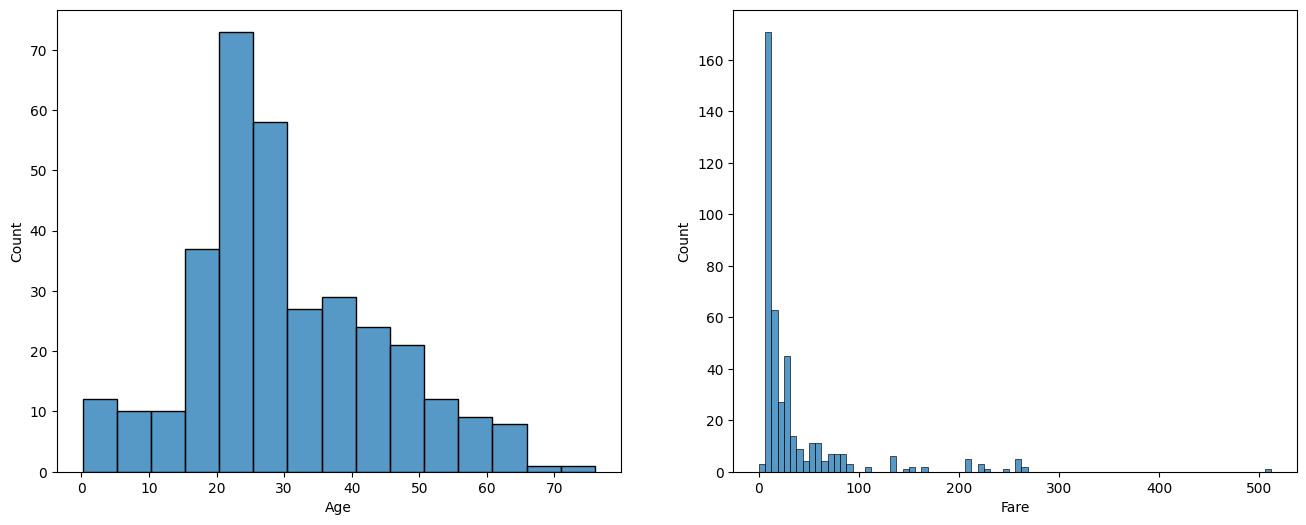

In [19]:
# Histogram:
fig, axs = plt.subplots(1,2,figsize=(16,6), gridspec_kw={'wspace': 0.2})
sns.histplot(test['Age'], ax = axs[0])
sns.histplot(test['Fare'], ax = axs[1])
plt.show()

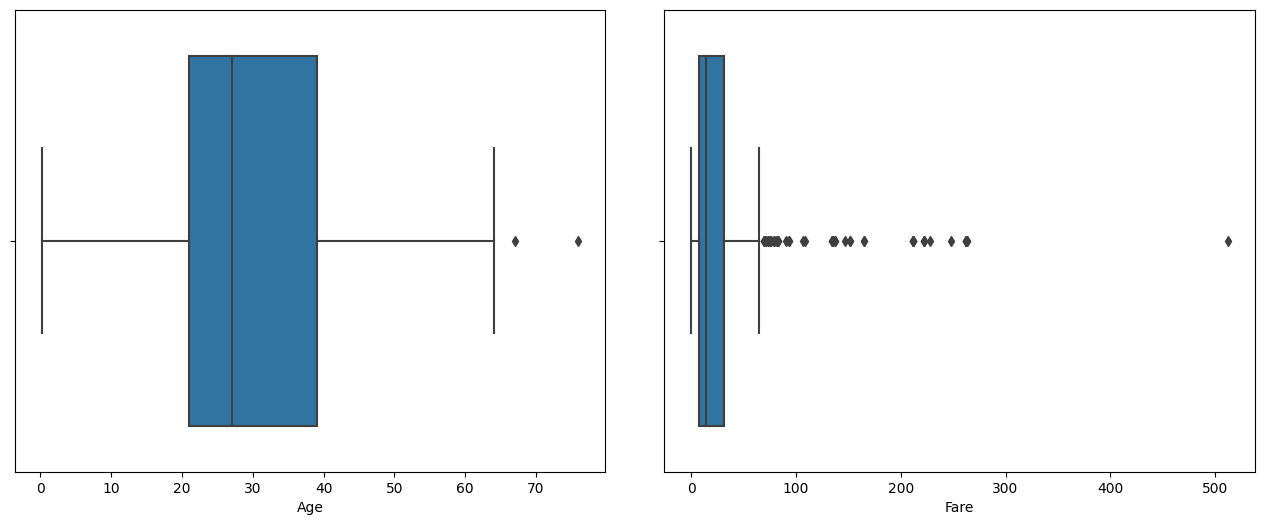

In [20]:
# Boxplot:
fig, axs = plt.subplots(1,2,figsize=(16,6), gridspec_kw={'wspace': 0.1})
sns.boxplot(x = test['Age'], ax = axs[0])
sns.boxplot(x = test['Fare'], ax = axs[1])
plt.show()

In [21]:
# test_Age:
Age_Q1 = test.Age.quantile(0.25)
Age_Q3 = test.Age.quantile(0.75)
Age_IQR = Age_Q3 - Age_Q1
Age_lower_extreme = Age_Q1 - 1.5*Age_IQR
Age_upper_extreme = Age_Q3 + 1.5*Age_IQR

In [22]:
#To see rows that contain outliers uing the interquartile range (IQR) method:
outlier_age = test[(test.Age<Age_lower_extreme)|(test.Age>Age_upper_extreme)]
print("the shape is:" ,outlier_age.shape)
print("-" * 20)
outlier_age.head(11)

the shape is: (2, 11)
--------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [23]:
# Fare:
Fare_Q1 = test.Fare.quantile(0.25)
Fare_Q3 = test.Fare.quantile(0.75)
Fare_IQR = Fare_Q3 - Fare_Q1
Fare_lower_extreme = Fare_Q1 - 1.5*Fare_IQR
Fare_upper_extreme = Fare_Q3 + 1.5*Fare_IQR

In [24]:
#To see rows that contain outliers uing the interquartile range (IQR) method:
outlier_Fare = test[(test.Fare<Fare_lower_extreme)|(test.Fare>Fare_upper_extreme)]
print("the shape is:",outlier_Fare.shape)
print("-" * 20)
(outlier_Fare.head())

the shape is: (55, 11)
--------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C


## 3)- Explore columns with qualitative (categorical) data:

### a)- Train set:

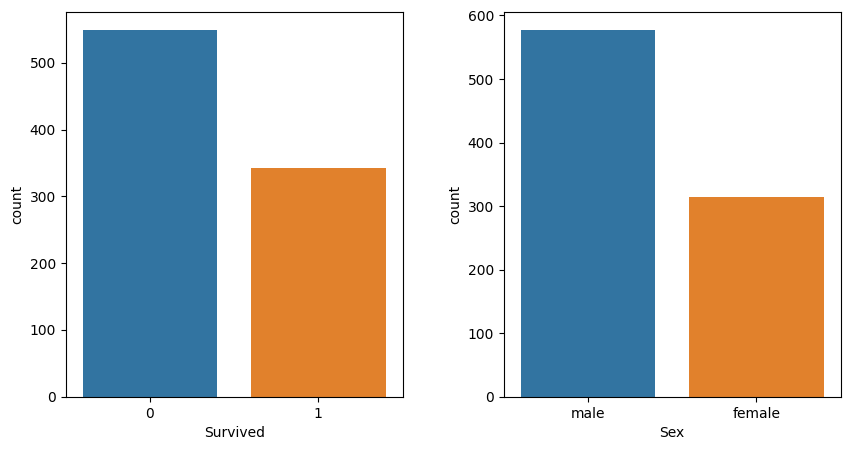

In [25]:
#  "Survived" and "Sex"
fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'wspace': 0.3})
sns.countplot(x='Survived', data = train, palette = 'tab10', ax = axs[0])
sns.countplot(x='Sex', data = train, palette = 'tab10', ax = axs[1])
plt.show()

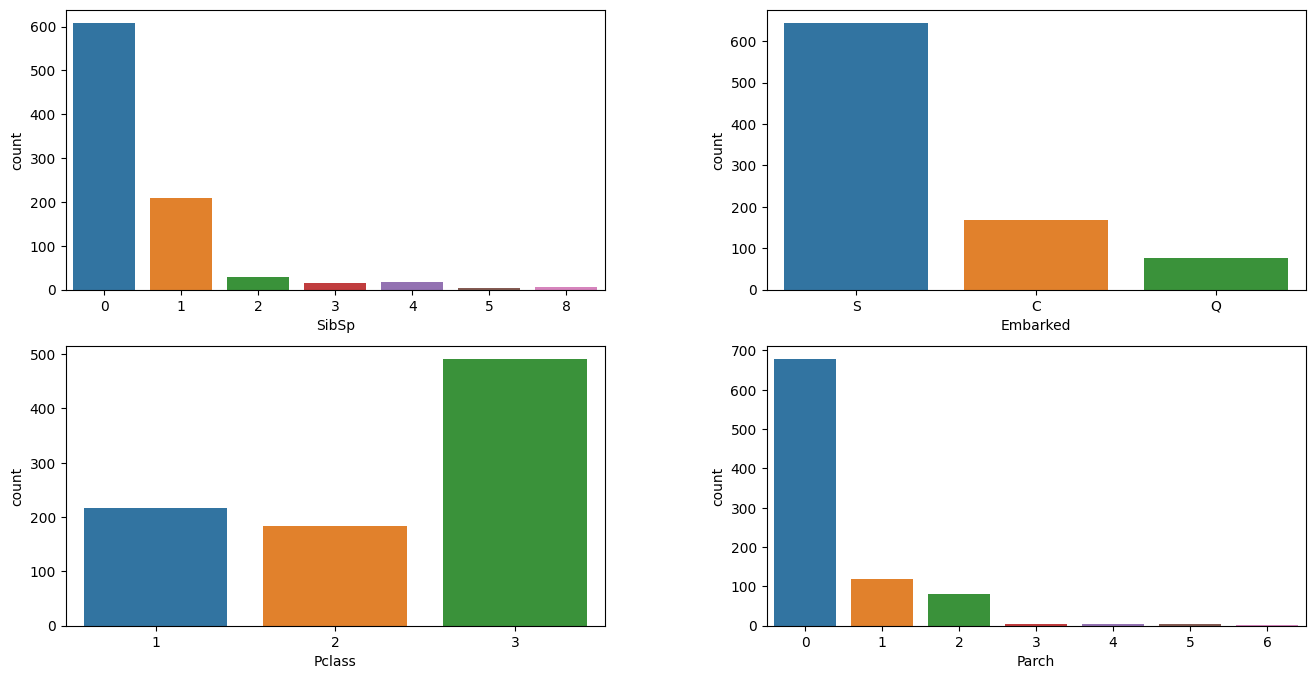

In [26]:
# "SibSp", "Embarked", "Pclass" and "Parch"
fig, axs = plt.subplots(2,2,figsize=(16,8), gridspec_kw={'wspace': 0.3})
sns.countplot(x= 'SibSp',data = train,  ax = axs[0,0])
sns.countplot(x='Embarked', data=train, ax = axs[0,1])
sns.countplot(x='Pclass', data=train, ax=axs[1, 0])
sns.countplot(x='Parch', data = train, ax=axs[1, 1])
plt.show()

### b)- Test set:

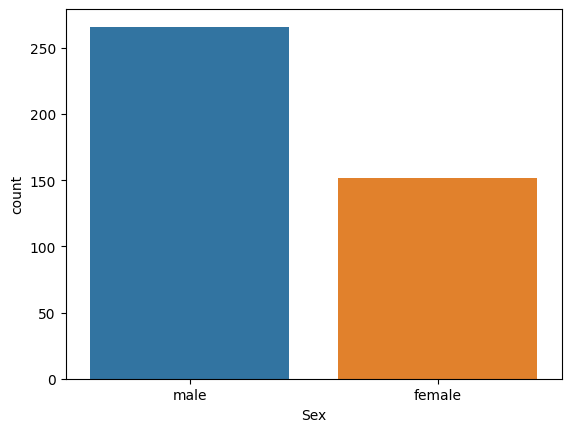

In [27]:
#"Sex"
sns.countplot(x='Sex', data = test, palette = 'tab10')
plt.show()

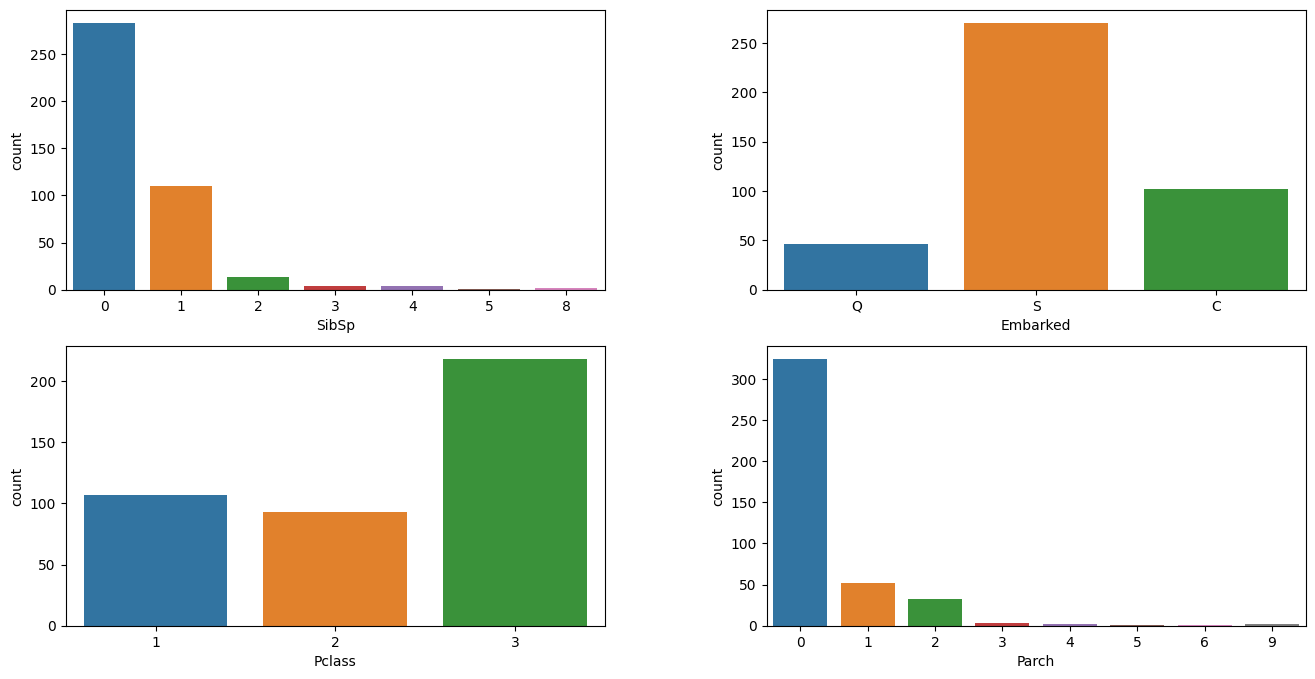

In [28]:
# "SibSp", "Embarked", "Pclass" and "Parch"
fig, axs = plt.subplots(2,2,figsize=(16,8), gridspec_kw={'wspace': 0.3})
sns.countplot(x= 'SibSp',data = test,  ax = axs[0,0])
sns.countplot(x='Embarked', data=test, ax = axs[0,1])
sns.countplot(x='Pclass', data=test, ax=axs[1, 0])
sns.countplot(x='Parch', data = test, ax=axs[1, 1])
plt.show()

# Data Cleaning:

**Based on the results of "Data Exploration", we will:**
* Drop the "Cabin" column from the training and test sets. This column has more than 70% missing values in both sets.
* Fill the "Age" and "Fare" columns with the median value. The descriptive statistics and histograms indicated a right-skewed distribution for these variables, which mean we can not use the mean in this case.
* Fill the "Embarked" column with the mode value.


In [29]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [30]:
# Filling the column age with the median:
train["Age"].fillna(train['Age'].median(), inplace = True)
test["Age"].fillna(test['Age'].median(), inplace = True)

In [31]:
# Filling the column Fare with the median:
test["Fare"].fillna(test['Fare'].median(), inplace = True)

In [32]:
# Filling the column "Embarked" with the mode:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)

# Data Preprocessing:

**In this step we will:**
* Convert the categorical columns 'Embarked'and 'Sex'into numerical representations.
* Drop unnecessary columns.

### a)- Train set:

**Convert the categorical columns 'Embarked'and 'Sex' into numerical representations.**

In [33]:
emb = pd.get_dummies(train['Embarked']).astype(int)
sex = pd.get_dummies(train['Sex'], drop_first = True).astype(int)

In [34]:
train = pd.concat([train, sex, emb] , axis = 1) 

In [35]:
train.rename(columns = {'male':'Gender'}, inplace = True)

**Delete unnecessary columns:**

In [36]:
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'],axis = 1, inplace = True) 

In [37]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


### b)- Test set:

**Encode the categorical columns 'Embarked', 'Sex', and 'Title'**

In [38]:
test_emb = pd.get_dummies(test['Embarked']).astype(int)
test_sex = pd.get_dummies(test['Sex'], drop_first = True).astype(int)

In [39]:
test = pd.concat([test, test_sex, test_emb], axis = 1) 

In [40]:
test.rename(columns = {'male':'Gender'}, inplace = True)

**Drop unnecessary columns.**

In [41]:
test.drop([ 'Name', 'Sex', 'Ticket', 'Embarked'],axis = 1, inplace = True) 

In [42]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1


# Modelling:

#### Models:
I will test the following models with the training set.

* Logistic Regression
* Support Vector Machines
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# dividing into train and test sets
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train["Survived"]

In [44]:
# Train test split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [45]:
print("X_train",x_train.shape)
print("X_validation",x_val.shape)
print("y_train",y_train.shape)
print("y_validation",y_val.shape)

X_train (712, 9)
X_validation (179, 9)
y_train (712,)
y_validation (179,)


In [46]:
# Import the models:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Import the evaluation metrics:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report, roc_auc_score

### 1. Logistic regression:

In [48]:
logreg = LogisticRegression(solver = 'liblinear', penalty= 'l1')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)

In [49]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



### 2. Decision Tree Classifier:

In [50]:
tree_para = {'max_depth' : [1, 2,5, 10,15, 20, 50], 'min_samples_split' : [2, 10, 20, 30, 40, 50, 100]}
score = {'accuracy', 'f1', 'recall'}
tuned_dt = DecisionTreeClassifier(random_state = 42)
clf = GridSearchCV(tuned_dt, tree_para, scoring = score, cv = 5, refit = 'accuracy')
clf.fit(x_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [51]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42)
dt.fit(x_train, y_train)
y_pred_2 = dt.predict(x_val)

In [52]:
print(classification_report(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       110
           1       0.73      0.62      0.67        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179



### 3. Random Forest Classifier:

In [53]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_3 = rf.predict(x_val)

In [54]:
print(classification_report(y_val, y_pred_3))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



### 4. Knn:

In [55]:
# create empty dic to store our train and test accuracies
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26) # array contain ranges of k values
for neighbor in neighbors: # we use for loop to repete our previous workflow,building several models using a different number of neighbors.
   knn = KNeighborsClassifier(n_neighbors = neighbor)
   knn.fit(x_train, y_train)
   train_accuracies[neighbor] = knn.score(x_train, y_train)
   test_accuracies[neighbor] = knn.score(x_val, y_val)

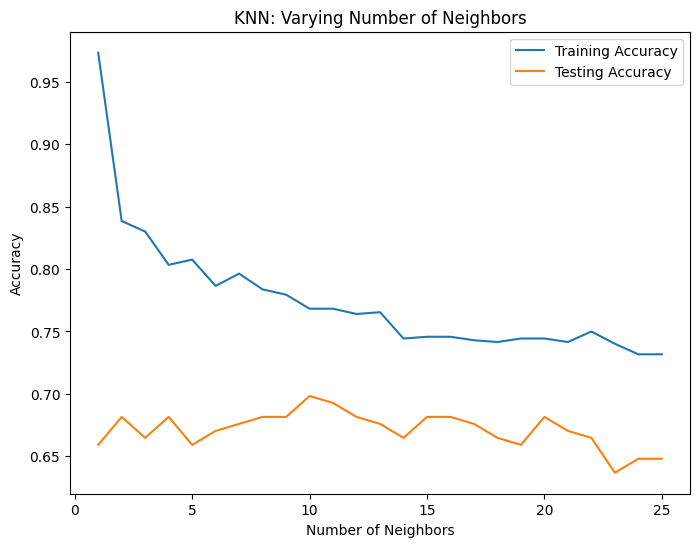

In [56]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [57]:
knn = KNeighborsClassifier(n_neighbors  = 10)
knn.fit(x_train, y_train)
y_pred_4 = knn.predict(x_val)

In [58]:
print(classification_report(y_val, y_pred_4))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       110
           1       0.65      0.46      0.54        69

    accuracy                           0.70       179
   macro avg       0.68      0.65      0.66       179
weighted avg       0.69      0.70      0.69       179



### 5. SVC:

In [59]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred_5 = svc.predict(x_val)

In [60]:
print(classification_report(y_val, y_pred_5))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



**Let's compare the accuracies and f1_ score of each model!**

* Accuracies:

In [61]:
acc_logreg = round(accuracy_score(y_pred, y_val), 4)
acc_dt = round(accuracy_score(y_pred_2, y_val), 4)
acc_rf = round(accuracy_score(y_pred_3, y_val), 4)
acc_knn = round(accuracy_score(y_pred_4, y_val), 4)
acc_svc = round(accuracy_score(y_pred_5, y_val), 4)

* F1_Score:

In [62]:
f1_logreg = round(f1_score(y_pred, y_val), 4)
f1_dt = round(f1_score(y_pred_2, y_val), 4)
f1_rf = round(f1_score(y_pred_3, y_val), 4)
f1_knn = round(f1_score(y_pred_4, y_val), 4)
f1_svc = round(f1_score(y_pred_5, y_val), 4)

In [63]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg,
              acc_rf, acc_dt],
    'f1_score' : [f1_svc, f1_knn, f1_logreg, f1_rf, f1_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score,f1_score
3,Random Forest,0.8101,0.7385
2,Logistic Regression,0.7989,0.7188
0,Support Vector Machines,0.7765,0.6923
4,Decision Tree,0.7654,0.6719
1,KNN,0.6983,0.5424


**I decided to use the Random Forest Clasifier model for the testing data.**

# Creating Submission File:

It's time to create a submission.csv file to upload to the Kaggle competition!



In [64]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = rf.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission_1.csv', index=False)